In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # plots inside IPython notebook cells
import pandas as pd
import numpy as np

# Matplotlib

https://matplotlib.org/index.html

In the following it is assumed that the reader is familar with [Numpy](numpy.ipynb) and [Pandas](pandas.ipynb).

## Matlab-Style API (pyplot)

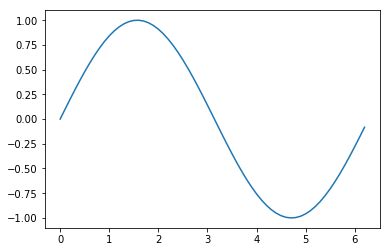

In [100]:
x = np.arange(0, 2*np.pi, 0.1) # numpy array
y = np.sin(x) # also a numpy array
plt.plot(x, y)

The *plot* function takes an array-like object as x and y values. Usually a Numpy array is used, but lists, etc. also work.

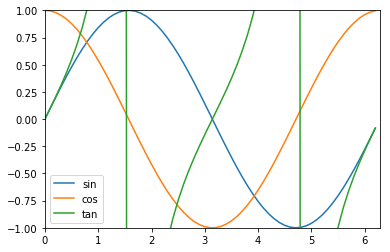

In [97]:
plt.plot(x, np.sin(x), 
         x, np.cos(x), 
         x, np.tan(x))
plt.axis([0, 2*np.pi, -1, 1])
plt.legend(['sin', 'cos', 'tan'])

Plotting multiple (x,y) pairs using a user-defined axis and legend.

Note that the modifications of the axis and the legend are done directly on the *plt* object, which is implicitly referring to the current plot, not explicitly on the plot itself.
This syntax is similar to Matlab, therefore it is called "Matlab-stype API".

The Matlab-style API (using *matplotlib.pyplot*) is usually faster to implement than the object-oriented API, but less explicit. Therefore, for more complex code usage of the object-oriented API is recommended.

## Object-Oriented API

In [156]:
fig = plt.figure()
fig.suptitle('my figure')

Text(0.5, 0.98, 'my figure')

<Figure size 432x288 with 0 Axes>

A figure object is defined, which can contain one or more plots.

A figure is plotted in one notebook cell or displayed in one window.

In [157]:
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('plot 1')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('plot 2')

Text(0.5, 1.0, 'plot 2')

The plots inside a figure are called __axes__ (not to be confused with axis!).

Here, 2 subplots are defined using the syntax

    figure.add_subplot(nr_rows, nr_columns, plot_number)

In [158]:
ax1.plot(x, np.sin(x))
ax1.plot(x, np.cos(x))
ax1.legend(['sin', 'cos'])
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x) or cos(x)')

Text(0, 0.5, 'sin(x) or cos(x)')

In [159]:
ax2.plot(x, np.tan(x))
ax2.legend(['tan'])
ax2.axis([0, max(x), -1, 1])
ax2.set_xlabel('x')
ax2.set_ylabel('tan(x)')

Text(0, 0.5, 'tan(x)')

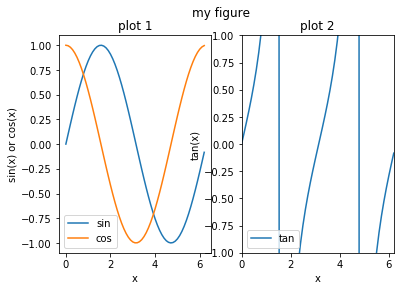

In [160]:
fig

There is implicit referencing to subplots (via *plt*) anymore, but clear and explicit references to the plots which are modified.

The plot formatting is however broken.

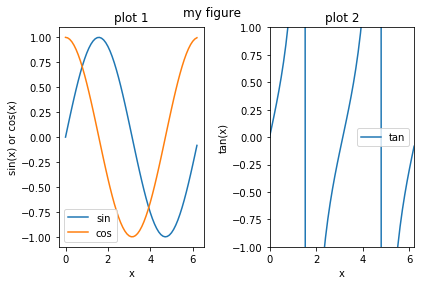

In [161]:
fig.tight_layout()
fig

Automatic reformatting so that axis labels, etc. are displayed correctly.

The methods invoked on *plt* in the Matlab stype API are usually invoked either on figures or axes the object-oriented API.

Although the object-oriented API may result in slightly longer code, it is preferred because explicit is better than implicit (Zen of Python).

## Plotting from Pandas

In [93]:
df = pd.DataFrame(index=np.arange(0, 2*np.pi, 0.1))
df['sin'], df['cos'], df['tan'] = np.sin(df.index), np.cos(df.index), np.tan(df.index)
df.head()

,sin,cos,tan
0.0,0.000000,1.000000,0.000000
0.1,0.099833,0.995004,0.100335
0.2,0.198669,0.980067,0.202710
0.3,0.295520,0.955336,0.309336
0.4,0.389418,0.921061,0.422793


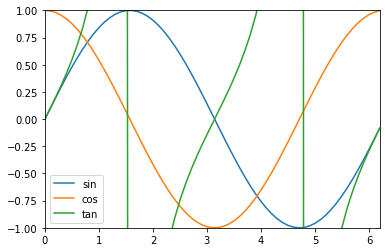

In [95]:
df.plot()
plt.axis([0, max(df.index), -1, 1])
plt.legend()

Plotting Matlab-style

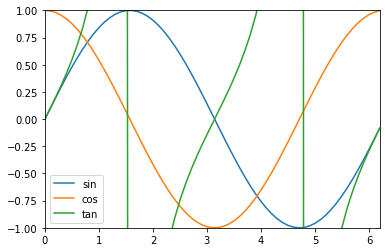

In [166]:
fig2 = plt.figure()
axes = fig2.add_subplot(1, 1, 1)
df.plot(ax=axes) # note that the axes object is passed to the DataFrame plot method
axes.axis([0, max(df.index), -1, 1])
axes.legend()

Plotting with object-oriented API.

# Seaborn